In [5]:
# Import libraries
library(dplyr)
library(readr)
library(tidyr)
library(ggplot2)

# Initial Analysis

In [6]:
# Read 'Climate_HistoricalNormals.csv' file
histNormDF <- read_csv("../../data/dataverse_files/Climate_HistoricalNormals.csv")
# Describe the file (cols name, cols type, first values, etc.)
glimpse(histNormDF)

Rows: 30 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Item, Item Detail, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oc...
dbl  (1): Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 30
Columns: 15
$ Item          <chr> "Precipitation", "Precipitation", "Precipitation", "Prec…
$ `Item Detail` <chr> "Rainfall (mm)", "Snowfall (cm)", "Precipitation (mm)", …
$ Jan           <chr> "242.3", "18.8", "261.1", "2", "1", "1", "152.1", "1968/…
$ Feb           <chr> "174.2", "15.1", "189.3", "2", "0", "0", "76.6", "1986/2…
$ Mar           <chr> "168.3", "3.8", "172", "0", "0", "0", "82.6", "1997/17",…
$ Apr           <chr> "144.4", "1.3", "145.7", "0", "0", "0", "59.9", "1991/03…
$ May           <chr> "111.7", "0", "111.7", "0", "0", "0", "60.8", "1989/17",…
$ Jun           <chr> "97.3", "0", "97.3", "0", "0", "0", "52.1", "1984/28", "…
$ Jul           <chr> "62.4", "0", "62.4", "0", "0", "0", "70.4", "1972/11", "…
$ Aug           <chr> "64.8", "0", "64.8", "0", "0", "0", "78.4", "1991/26", "…
$ Sep           <chr> "81.2", "0", "81.2", "0", "0", "0", "86.6", "1968/16", "…
$ Oct           <chr> "202.1", "0.2", "202.3", "0", "0", "0", "91.2", "1975/16…
$ Nov           <ch

In [103]:
# See first 10 rows
histNormDF %>%
    slice(1:10)

Item,Item Detail,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Precipitation,Rainfall (mm),242.3,174.2,168.3,144.4,111.7,97.3,62.4,64.8,81.2,202.1,304,230.9,1883.6
Precipitation,Snowfall (cm),18.8,15.1,3.8,1.3,0,0,0,0,0,0.2,4.1,19.3,62.6
Precipitation,Precipitation (mm),261.1,189.3,172,145.7,111.7,97.3,62.4,64.8,81.2,202.3,308.1,250.2,1946.2
Precipitation,Average Snow Depth (cm),2,2,0,0,0,0,0,0,0,0,0,1,0.0
Precipitation,Median Snow Depth (cm),1,0,0,0,0,0,0,0,0,0,0,0,0.0
Precipitation,Snow Depth at Month-end (cm),1,0,0,0,0,0,0,0,0,0,0,4,0.0
Precipitation,Extreme Daily Rainfall (mm),152.1,76.6,82.6,59.9,60.8,52.1,70.4,78.4,86.6,91.2,102.1,108.2,NA
Precipitation,Date (yyyy/dd),1968/18,1986/23,1997/17,1991/03,1989/17,1984/28,1972/11,1991/26,1968/16,1975/16,1964/29,1972/25,NA
Precipitation,Extreme Daily Snowfall (cm),31.5,30,25.4,14,0,0,0,0,0,3,22.9,33,NA


# Precipitation - Analysis

In [15]:
# Create DataFrame for rows that are related to 'Precipitation' (column: Item)
histNormPrecDF <- histNormDF %>%
    filter(Item == "Precipitation") %>%
    select(!c(Item, Year))

In [70]:
# Unpivot and pivot DataFrame in order to have a format easier to plot
monthlyPrecV1DF <- histNormPrecDF %>%
    filter(`Item Detail` %in% c("Rainfall (mm)", "Snowfall (cm)", "Extreme Daily Rainfall (mm)", "Extreme Daily Snowfall (cm)")) %>%
    pivot_longer(-`Item Detail`, names_to = "Month") %>%
    pivot_wider(names_from = `Item Detail`, values_from = value) %>%
    transmute(
        Month = factor(Month, levels = month.abb),
        `Rainfall (mm)` = as.double(`Rainfall (mm)`),
        `Extreme Daily Rainfall (mm)` = as.double(`Extreme Daily Rainfall (mm)`),
        `Snowfall (mm)` = as.double(`Snowfall (cm)`) * 10,
        `Extreme Daily Snowfall (mm)` = as.double(`Extreme Daily Snowfall (cm)`) * 10
    )
# Display new DataFrame
monthlyPrecV1DF %>%
    slice(1:10)

Month,Rainfall (mm),Extreme Daily Rainfall (mm),Snowfall (mm),Extreme Daily Snowfall (mm)
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Jan,242.3,152.1,188,315
Feb,174.2,76.6,151,300
Mar,168.3,82.6,38,254
Apr,144.4,59.9,13,140
May,111.7,60.8,0,0
Jun,97.3,52.1,0,0
Jul,62.4,70.4,0,0
Aug,64.8,78.4,0,0
Sep,81.2,86.6,0,0


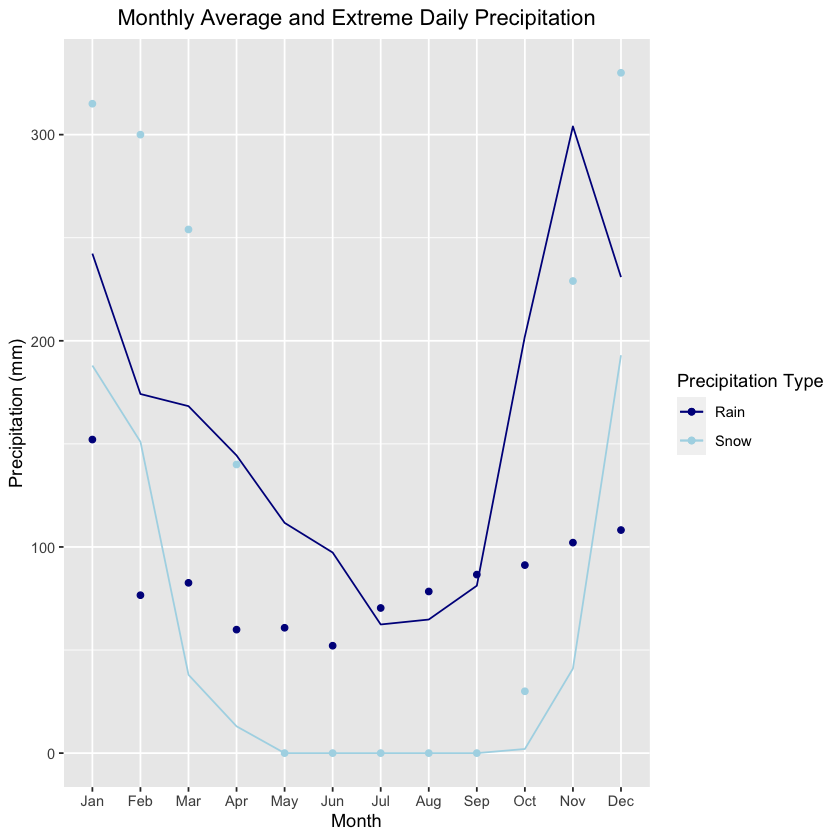

In [71]:
# Data vizualisation: Find trends in precipitations throughout a normal year
# Core
ggplot(
    monthlyPrecV1DF, 
    aes(x = Month, group = 1)
) + 
# Lines and points definition
geom_line(aes(y = `Rainfall (mm)`, color = "Rain")) +
geom_line(aes(y = `Snowfall (mm)`, color = "Snow")) +
geom_point(aes(y = `Extreme Daily Rainfall (mm)`, color = "Rain")) + 
geom_point(aes(y = `Extreme Daily Snowfall (mm)`, color = "Snow")) + 
# Lines and points color definiton
scale_color_manual(
    name = "Precipitation Type",
    values = c("Rain" = "darkblue", "Snow" = "lightblue")
) +
# Add labels to axis and add title
labs(
    title = "Monthly Average and Extreme Daily Precipitation", 
    x = "Month", 
    y = "Precipitation (mm)"
) + 
# Center title
theme(plot.title = element_text(hjust = 0.5))

In [22]:
# Unpivot DataFrame in order to have a format easier to plot
monthlyPrecV2DF <- histNormPrecDF %>%
    filter(`Item Detail` %in% c("Rainfall (mm)", "Snowfall (cm)", "Extreme Daily Rainfall (mm)", "Extreme Daily Snowfall (cm)")) %>%
    pivot_longer(-`Item Detail`, names_to = "Month") %>%
    mutate(
        Month = factor(Month, levels = month.abb),
        value = if_else(
            grepl("cm", `Item Detail`),
            as.double(value) * 10,
            as.double(value)
        ),
        `Item Detail` = sub("cm", "mm", `Item Detail`)
    )
# Display new DataFrame
monthlyPrecV2DF %>%
    slice(1:10)

Item Detail,Month,value
<chr>,<fct>,<dbl>
Rainfall (mm),Jan,242.3
Rainfall (mm),Feb,174.2
Rainfall (mm),Mar,168.3
Rainfall (mm),Apr,144.4
Rainfall (mm),May,111.7
Rainfall (mm),Jun,97.3
Rainfall (mm),Jul,62.4
Rainfall (mm),Aug,64.8
Rainfall (mm),Sep,81.2


List of 1
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 0.5
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

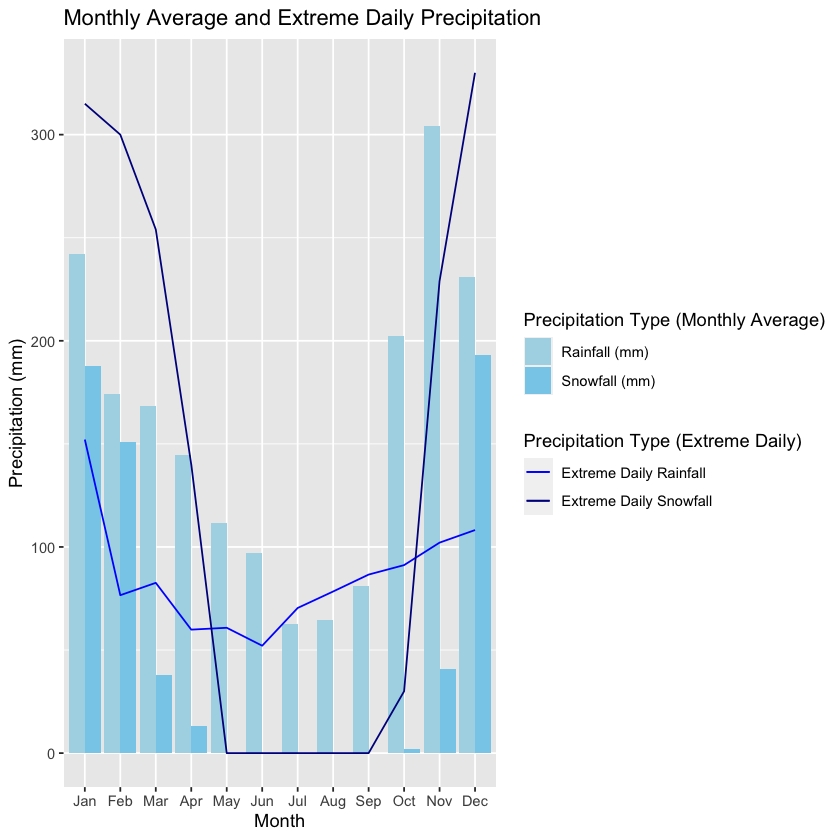

In [81]:
# Average Precipitations DataFrame - Barchart
avgPrecDF <- monthlyPrecV2DF %>% filter(`Item Detail` %in% c("Rainfall (mm)", "Snowfall (mm)"))
# Rainfall Extremes Daily DataFrame - Linechart
extRfDF <- monthlyPrecV2DF %>% filter(`Item Detail` == "Extreme Daily Rainfall (mm)")
# Snowfall Extremes Daily DataFrame - Linechart
extSfDF <- monthlyPrecV2DF %>% filter(`Item Detail` == "Extreme Daily Snowfall (mm)")

# Data Vizualisation: Count of days in precipitation ranges by month
ggplot(avgPrecDF) +
    geom_col(aes(x = Month, y = value, fill = `Item Detail`), width = 0.9, position = position_dodge(width=0.9)) +
    geom_line(data = extRfDF, aes(x = Month, y = value, color = "Extreme Daily Rainfall", group = 1)) +
    geom_line(data = extSfDF, aes(x = Month, y = value, color = "Extreme Daily Snowfall", group = 1)) +
    scale_fill_manual(
        name = "Precipitation Type (Monthly Average)",
        values = c("lightblue", "skyblue")
    ) + 
    scale_color_manual(
        name = "Precipitation Type (Extreme Daily)",
        values = c(
            "Extreme Daily Rainfall" = "blue", 
            "Extreme Daily Snowfall" = "darkblue"
        )
    ) +
    # Add labels to axis and add title
    labs(
        title = "Monthly Average and Extreme Daily Precipitation", 
        x = "Month", 
        y = "Precipitation (mm)"
    )
    # Center title
    theme(
        plot.title = element_text(hjust = 0.5),
        axis
    )

# Days with Rainfall - Analysis

In [176]:
# Create 'Days with Rainfall' DataFrame
histNormWithRfDF <- histNormDF %>%
    filter(Item == "Days with Rainfall") %>%
    select(!c(Item, Year))
# Display DataFrame    
histNormWithRfDF

Item Detail,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
>= 0.2 mm,18.5,14.9,18.3,17,15.1,13.2,8.6,8.4,9.4,16.8,21.4,17.9
>= 5 mm,12.2,9.1,9.7,8.4,7,5.7,3.7,3.3,4,9.8,14.3,11
>= 10 mm,7.9,6.3,6.2,5.2,4,3.5,2.2,1.9,2.7,7.3,10.7,7.9
>= 25 mm,2.8,2,1.5,1.3,0.85,0.81,0.38,0.71,0.86,2.6,4.1,2.9


In [175]:
# Unpivot and pivot DataFrame in order to have a format easier to plot
monthlyRfDF <- histNormWithRfDF %>%
    pivot_longer(-`Item Detail`, names_to = "Month") %>%
    transmute(
        `Item Detail` = factor(`Item Detail`, levels = c(">= 0.2 mm", ">= 5 mm", ">= 10 mm", ">= 25 mm")),
        Month = factor(Month, levels = month.abb),
        value = as.double(value)
    )
# Display new DataFrame
monthlyRfDF %>%
    slice(1:10)

Item Detail,Month,value
<fct>,<fct>,<dbl>
>= 0.2 mm,Jan,18.5
>= 0.2 mm,Feb,14.9
>= 0.2 mm,Mar,18.3
>= 0.2 mm,Apr,17.0
>= 0.2 mm,May,15.1
>= 0.2 mm,Jun,13.2
>= 0.2 mm,Jul,8.6
>= 0.2 mm,Aug,8.4
>= 0.2 mm,Sep,9.4


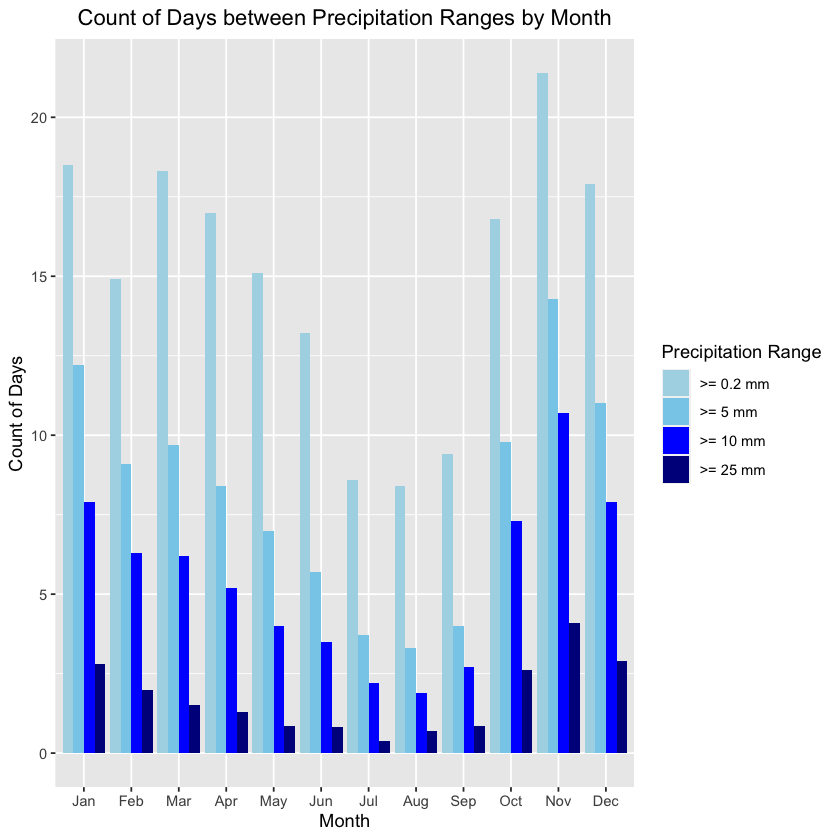

In [174]:
# Data Vizualisation: Count of days in precipitation ranges by month
ggplot(monthlyRfDF, aes(x = Month, y = value, fill=`Item Detail`)) +
    geom_col(width = 0.9, position = position_dodge(width=0.9)) +
    scale_fill_manual(
        name = "Precipitation Range", 
        values = c("lightblue", "skyblue", "blue", "darkblue")
    ) +
    # Add labels to axis and add title
    labs(
        title = "Count of Days by Rainfall Precipitation Ranges by Month", 
        x = "Month", 
        y = "Count of Days"
    ) + 
    # Center title
    theme(plot.title = element_text(hjust = 0.5))

# Days With Snowfall - Analysis

In [9]:
# Create 'Days with Snowfall' DataFrame
histNormWithSfDF <- histNormDF %>%
    filter(Item == "Days With Snowfall") %>%
    select(!c(Item, Year))
# Display DataFrame    
histNormWithSfDF

Item Detail,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
>= 0.2 cm,3.1,2.5,1.1,0.57,0,0,0,0,0,0.1,1.2,4.1
>= 5 cm,1.4,1,0.24,0.05,0,0,0,0,0,0,0.33,1.3
>= 10 cm,0.86,0.52,0.1,0,0,0,0,0,0,0,0.1,0.5
>= 25 cm,0,0.05,0,0,0,0,0,0,0,0,0,0.15


In [10]:
# Unpivot and pivot DataFrame in order to have a format easier to plot
monthlySfDF <- histNormWithSfDF %>%
    pivot_longer(-`Item Detail`, names_to = "Month") %>%
    transmute(
        `Item Detail` = factor(`Item Detail`, levels = c(">= 0.2 cm", ">= 5 cm", ">= 10 cm", ">= 25 cm")),
        Month = factor(Month, levels = month.abb),
        value = as.double(value)
    )
# Display new DataFrame
monthlySfDF %>%
    slice(1:10)

Item Detail,Month,value
<fct>,<fct>,<dbl>
>= 0.2 cm,Jan,3.10
>= 0.2 cm,Feb,2.50
>= 0.2 cm,Mar,1.10
>= 0.2 cm,Apr,0.57
>= 0.2 cm,May,0.00
>= 0.2 cm,Jun,0.00
>= 0.2 cm,Jul,0.00
>= 0.2 cm,Aug,0.00
>= 0.2 cm,Sep,0.00


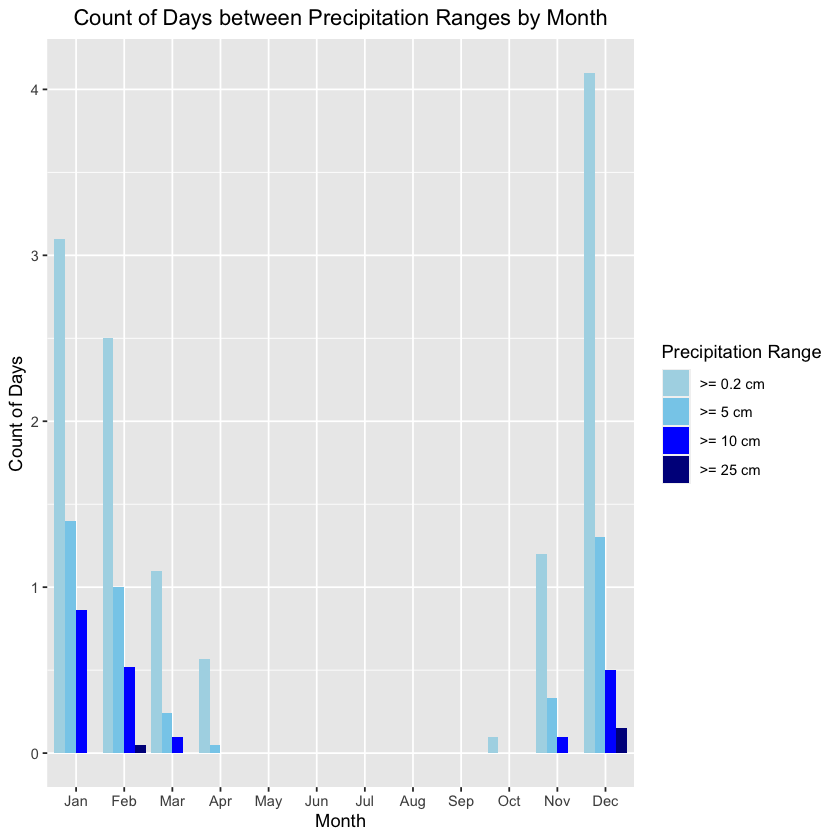

In [11]:
# Data Vizualisation: Count of days in precipitation ranges by month
ggplot(monthlySfDF, aes(x = Month, y = value, fill=`Item Detail`)) +
    geom_col(width = 0.9, position = position_dodge(width=0.9)) +
    scale_fill_manual(
        name = "Precipitation Range", 
        values = c("lightblue", "skyblue", "blue", "darkblue")
    ) +
    # Add labels to axis and add title
    labs(
        title = "Count of Days by Snowfall Precipitation Ranges by Month", 
        x = "Month", 
        y = "Count of Days"
    ) + 
    # Center title
    theme(plot.title = element_text(hjust = 0.5))